# BETO

Um investidor está em dívida onde aplicar seu dinheiro (R$ 40.000,00).
Sua dúvida está entre duas aplicações, cujos comportamentos (rentabilidade mensal) estão nas tabelas abaixo:

Aplicação A 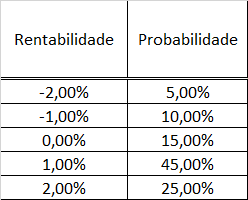         Aplicação B
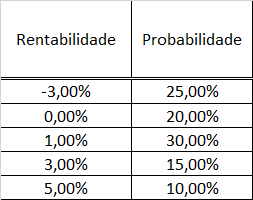  

Simule para os próximos 12 meses cada aplicação e determine qual a aplicação é mais interessante.

In [1]:
import pandas as pd
import numpy as np

aplicacaoA = {
    'RentabilidadeA': [-0.02, -0.01, 0.00, 0.01, 0.02],
    'ProbabilidadeA':[0.05, 0.10, 0.15, 0.45, 0.25]
}

aplicacaoB = {
    'RentabilidadeB': [-0.03, 0.00, 0.01, 0.03, 0.05],
    'ProbabilidadeB':[0.25, 0.20, 0.30, 0.15, 0.10]
}



dist_freqA = pd.DataFrame(aplicacaoA)
print(dist_freqA)

dist_freqB = pd.DataFrame(aplicacaoB)
print(dist_freqB)

   RentabilidadeA  ProbabilidadeA
0           -0.02            0.05
1           -0.01            0.10
2            0.00            0.15
3            0.01            0.45
4            0.02            0.25
   RentabilidadeB  ProbabilidadeB
0           -0.03            0.25
1            0.00            0.20
2            0.01            0.30
3            0.03            0.15
4            0.05            0.10


Como é possível SIMULAR a as aplicações A e B, obedecendo às probabilidades apresentadas neste DataFrame dist_freqA e dist_freqB?

Através da geração de números aleatórios, que pode ser feita com a função random.randint(100) do NumPy, mas antes disso precisamos elaborar um DataFrame 3 com as probabilidades acumuladas:

In [2]:
Probabilidade_acumuladaA = []
acumA = 0
for x in dist_freqA['ProbabilidadeA']:
    resultadoA = x + acumA
    Probabilidade_acumuladaA.append(resultadoA)
    acumA = resultadoA
    
Probabilidade_acumuladaB = []
acumB = 0
for x in dist_freqB['ProbabilidadeB']:
    resultadoB = x + acumB
    Probabilidade_acumuladaB.append(resultadoB)
    acumB = resultadoB

# Adicione uma nova coluna chamada 'Probabilidade Acumulada'

dist_freqA['Probabilidade_acumuladaA'] = Probabilidade_acumuladaA
print(dist_freqA)

dist_freqB['Probabilidade_acumuladaB'] = Probabilidade_acumuladaB
print(dist_freqB)


   RentabilidadeA  ProbabilidadeA  Probabilidade_acumuladaA
0           -0.02            0.05                      0.05
1           -0.01            0.10                      0.15
2            0.00            0.15                      0.30
3            0.01            0.45                      0.75
4            0.02            0.25                      1.00
   RentabilidadeB  ProbabilidadeB  Probabilidade_acumuladaB
0           -0.03            0.25                      0.25
1            0.00            0.20                      0.45
2            0.01            0.30                      0.75
3            0.03            0.15                      0.90
4            0.05            0.10                      1.00


Com essas probabilidades acumuladas construímos os intervalos de números aleatórios e a matriz de busca para as rentabilidades dados os números aleatórios

In [3]:
# Para a Aplicação A
lim_superior_rentabilidadeA = []

for x in dist_freqA['Probabilidade_acumuladaA']:
    lim_sup = x * 100
    lim_superior_rentabilidadeA.append(lim_sup)

lim_sup
lim_superior_rentabilidadeA

dist_freqA['lim_superior_rentabilidadeA'] = lim_superior_rentabilidadeA
print(dist_freqA)

# Para a Aplicação B
lim_superior_rentabilidadeB = []

for x in dist_freqB['Probabilidade_acumuladaB']:
    lim_sup = x * 100
    lim_superior_rentabilidadeB.append(lim_sup)

lim_sup
lim_superior_rentabilidadeB

dist_freqB['lim_superior_rentabilidadeB'] = lim_superior_rentabilidadeB
print(dist_freqB)

   RentabilidadeA  ProbabilidadeA  Probabilidade_acumuladaA  \
0           -0.02            0.05                      0.05   
1           -0.01            0.10                      0.15   
2            0.00            0.15                      0.30   
3            0.01            0.45                      0.75   
4            0.02            0.25                      1.00   

   lim_superior_rentabilidadeA  
0                          5.0  
1                         15.0  
2                         30.0  
3                         75.0  
4                        100.0  
   RentabilidadeB  ProbabilidadeB  Probabilidade_acumuladaB  \
0           -0.03            0.25                      0.25   
1            0.00            0.20                      0.45   
2            0.01            0.30                      0.75   
3            0.03            0.15                      0.90   
4            0.05            0.10                      1.00   

   lim_superior_rentabilidadeB  
0          

In [4]:
# Para a Aplicação A
lim_inferior_rentabilidadeA = [1]

for x in dist_freqA['lim_superior_rentabilidadeA']:
    lim_inf = x + 1
    lim_inferior_rentabilidadeA.append(lim_inf)
    
lim_inferior_rentabilidadeA
lim_inferior_rentabilidadeA.pop(-1)
print(lim_inferior_rentabilidadeA)

dist_freqA['lim_inferior_rentabilidadeA'] = lim_inferior_rentabilidadeA
print(dist_freqA)

# Para a Aplicação B
lim_inferior_rentabilidadeB = [1]

for x in dist_freqB['lim_superior_rentabilidadeB']:
    lim_inf = x + 1
    lim_inferior_rentabilidadeB.append(lim_inf)
    
lim_inferior_rentabilidadeB
lim_inferior_rentabilidadeB.pop(-1)
print(lim_inferior_rentabilidadeB)

dist_freqB['lim_inferior_rentabilidadeB'] = lim_inferior_rentabilidadeB
print(dist_freqB)

[1, 6.0, 16.0, 31.000000000000004, 76.0]
   RentabilidadeA  ProbabilidadeA  Probabilidade_acumuladaA  \
0           -0.02            0.05                      0.05   
1           -0.01            0.10                      0.15   
2            0.00            0.15                      0.30   
3            0.01            0.45                      0.75   
4            0.02            0.25                      1.00   

   lim_superior_rentabilidadeA  lim_inferior_rentabilidadeA  
0                          5.0                          1.0  
1                         15.0                          6.0  
2                         30.0                         16.0  
3                         75.0                         31.0  
4                        100.0                         76.0  
[1, 26.0, 46.0, 76.0, 91.0]
   RentabilidadeB  ProbabilidadeB  Probabilidade_acumuladaB  \
0           -0.03            0.25                      0.25   
1            0.00            0.20                     

In [5]:
matriz_buscaA = dist_freqA.loc[:,['RentabilidadeA','lim_inferior_rentabilidadeA','lim_superior_rentabilidadeA']]
print(matriz_buscaA)

matriz_buscaB = dist_freqB.loc[:,['RentabilidadeB','lim_inferior_rentabilidadeB','lim_superior_rentabilidadeB']]
print(matriz_buscaB)

   RentabilidadeA  lim_inferior_rentabilidadeA  lim_superior_rentabilidadeA
0           -0.02                          1.0                          5.0
1           -0.01                          6.0                         15.0
2            0.00                         16.0                         30.0
3            0.01                         31.0                         75.0
4            0.02                         76.0                        100.0
   RentabilidadeB  lim_inferior_rentabilidadeB  lim_superior_rentabilidadeB
0           -0.03                          1.0                         25.0
1            0.00                         26.0                         45.0
2            0.01                         46.0                         75.0
3            0.03                         76.0                         90.0
4            0.05                         91.0                        100.0


In [7]:
contagemA = matriz_buscaA['RentabilidadeA'].count()    #contagem das linhas da matriz de busca
print(contagemA)
contagemB = matriz_buscaB['RentabilidadeB'].count()    #contagem das linhas da matriz de busca
print(contagemB)

5
5


Agora vamos inserir quantas tentativas gerando números aleatórios e, buscando o intervalo que ele se encontra na matriz de busca, teremos as Rentabilidades. Aqui vamos fazer 12 tentativas (1 ano)

In [9]:
from numpy import random

def criaListaA(lim_inferior_rentabilidadeA, lim_superior_rentabilidadeA):
    return np.arange(lim_inferior_rentabilidadeA, lim_superior_rentabilidadeA+1,1)

def criaListaB(lim_inferior_rentabilidadeB, lim_superior_rentabilidadeB):
    return np.arange(lim_inferior_rentabilidadeB, lim_superior_rentabilidadeB+1,1)


tentativas = int(input("Digite quantas tentativas quer fazer: "))

lista_meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

lista_rentabilidadeA = []
lista_rentabilidadeB = []

lista_randomicaA = []
lista_randomicaB = []

lista_saldo_inicialA = [40000,0,0,0,0,0,0,0,0,0,0,0]
lista_saldo_inicialB = [40000,0,0,0,0,0,0,0,0,0,0,0]


j = 0
while j <= tentativas:
    aleaA = random.randint(100)
    
    for i in range(0,contagemA):
        xA=int(matriz_buscaA.iloc[i]['lim_inferior_rentabilidadeA'])
        yA=int(matriz_buscaA.iloc[i]['lim_superior_rentabilidadeA'])
        
        zA=matriz_buscaA.iloc[i]['RentabilidadeA']
        
        listaA = criaListaA(xA,yA)
        listaA2=listaA.tolist()    # Transformando array para lista
            
        if aleaA in listaA2:
            rentabilidadeA = zA
            lista_rentabilidadeA.append(rentabilidadeA) 
            lista_randomicaA.append(aleaA) 
            j += 1
        else:
            pass
    #j += 1

matriz_rentabilidadeA = pd.DataFrame(lista_rentabilidadeA, index = [lista_meses], columns=['RentabilidadeA (%)'])
matriz_rentabilidadeA['Num. AleatórioA'] = lista_randomicaA
for k in range(tentativas):
    if k ==0:
        matriz_rentabilidadeA['Saldo inicialA']=40000
        matriz_rentabilidadeA['RentabilidadeA'] = matriz_rentabilidadeA['Saldo inicialA'] * matriz_rentabilidadeA['RentabilidadeA (%)']
        matriz_rentabilidadeA['Saldo FinalA'] = matriz_rentabilidadeA['Saldo inicialA']+matriz_rentabilidadeA['Saldo inicialA'] * matriz_rentabilidadeA['RentabilidadeA (%)']
        
    else:
        matriz_rentabilidadeA['Saldo inicialA'][k]= matriz_rentabilidadeA['Saldo FinalA'][k-1]
        matriz_rentabilidadeA['RentabilidadeA'] = matriz_rentabilidadeA['Saldo inicialA'] * matriz_rentabilidadeA['RentabilidadeA (%)']
        matriz_rentabilidadeA['Saldo FinalA'] = matriz_rentabilidadeA['Saldo inicialA']+matriz_rentabilidadeA['Saldo inicialA'] * matriz_rentabilidadeA['RentabilidadeA (%)']

print('Aplicação A: \n',matriz_rentabilidadeA, '\n')
media_rentabilidadeA = matriz_rentabilidadeA['RentabilidadeA'].mean()
mediana_rentabilidadeA = matriz_rentabilidadeA['RentabilidadeA'].median()
moda_rentabilidadeA = matriz_rentabilidadeA['RentabilidadeA'].mode()
desvio_padrao_rentabilidadeA = matriz_rentabilidadeA['RentabilidadeA'].std()
maxima_rentabilidadeA = matriz_rentabilidadeA['RentabilidadeA'].max()
minima_rentabilidadeA = matriz_rentabilidadeA['RentabilidadeA'].min()

#print('A média da RentabilidadeA é: {:.2f}'.format(media_rentabilidadeA))
pd.options.display.float_format = '{:,.2f}'.format
#Sumário EstatísticoA
print('\nEstatísticas Aplicação A:\n', matriz_rentabilidadeA.describe())

j = 0
while j <= tentativas:
    aleaB = random.randint(100)
    for i in range(0,contagemB):
        xB=int(matriz_buscaB.iloc[i]['lim_inferior_rentabilidadeB'])
        yB=int(matriz_buscaB.iloc[i]['lim_superior_rentabilidadeB'])

        zB=matriz_buscaB.iloc[i]['RentabilidadeB']
        
        listaB = criaListaB(xB,yB)
        listaB2=listaB.tolist()           # Transformando array para lista
            
        if aleaB in listaB2:
            rentabilidadeB = zB
            lista_rentabilidadeB.append(rentabilidadeB) 
            lista_randomicaB.append(aleaB)    
            j += 1
        else:
            pass
    #j += 1

matriz_rentabilidadeB = pd.DataFrame(lista_rentabilidadeB, index=[lista_meses], columns=['RentabilidadeB (%)'])
matriz_rentabilidadeB['Num. AleatórioB'] = lista_randomicaB
for k in range(tentativas):
    if k ==0:
        matriz_rentabilidadeB['Saldo inicialB']=40000
        matriz_rentabilidadeB['RentabilidadeB'] = matriz_rentabilidadeB['Saldo inicialB'] * matriz_rentabilidadeB['RentabilidadeB (%)']
        matriz_rentabilidadeB['Saldo FinalB'] = matriz_rentabilidadeB['Saldo inicialB']+matriz_rentabilidadeB['Saldo inicialB'] * matriz_rentabilidadeB['RentabilidadeB (%)']
        
    else:
        matriz_rentabilidadeB['Saldo inicialB'][k]= matriz_rentabilidadeB['Saldo FinalB'][k-1]
        matriz_rentabilidadeB['RentabilidadeB'] = matriz_rentabilidadeB['Saldo inicialB'] * matriz_rentabilidadeB['RentabilidadeB (%)']
        matriz_rentabilidadeB['Saldo FinalB'] = matriz_rentabilidadeB['Saldo inicialB']+matriz_rentabilidadeB['Saldo inicialB'] * matriz_rentabilidadeB['RentabilidadeB (%)']
        
print('\nAplicação B: \n',matriz_rentabilidadeB, '\n')
media_rentabilidadeB = matriz_rentabilidadeB['RentabilidadeB'].mean()
mediana_rentabilidadeB = matriz_rentabilidadeB['RentabilidadeB'].median()
moda_rentabilidadeB = matriz_rentabilidadeB['RentabilidadeB'].mode()
desvio_padrao_rentabilidadeB = matriz_rentabilidadeB['RentabilidadeB'].std()
maxima_rentabilidadeB = matriz_rentabilidadeB['RentabilidadeB'].max()
minima_rentabilidadeB = matriz_rentabilidadeB['RentabilidadeB'].min()

#print('\nA média da RentabilidadeB é: {:.2f}'.format(media_rentabilidadeB))

#Sumário EstatísticoB
print('\nEstatísticas Aplicação B:\n',matriz_rentabilidadeB.describe(), '\n')

Digite quantas tentativas quer fazer: 11
Aplicação A: 
            RentabilidadeA (%)  Num. AleatórioA  Saldo inicialA  \
Janeiro                  0.01               33           40000   
Fevereiro                0.01               53           40400   
Março                    0.01               61           40804   
Abril                    0.01               50           41212   
Maio                     0.02               90           41624   
Junho                   -0.01                9           42456   
Julho                    0.01               38           42031   
Agosto                   0.02               92           42451   
Setembro                 0.02               95           43300   
Outubro                  0.01               41           44166   
Novembro                 0.01               42           44607   
Dezembro                 0.01               56           40000   

           RentabilidadeA  Saldo FinalA  
Janeiro            400.00      40400.00  
F

<ipython-input-9-9159815b911e>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matriz_rentabilidadeA['Saldo inicialA'][k]= matriz_rentabilidadeA['Saldo FinalA'][k-1]
<ipython-input-9-9159815b911e>:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matriz_rentabilidadeB['Saldo inicialB'][k]= matriz_rentabilidadeB['Saldo FinalB'][k-1]


### Usando o método choice() do random NumPy: np.random.choice()

In [10]:
import pandas as pd
import numpy as np

aplicacaoA = {
    'RentabilidadeA': [-0.02, -0.01, 0.00, 0.01, 0.02],
    'ProbabilidadeA':[0.05, 0.10, 0.15, 0.45, 0.25]
}

aplicacaoB = {
    'RentabilidadeB': [-0.03, 0.00, 0.01, 0.03, 0.05],
    'ProbabilidadeB':[0.25, 0.20, 0.30, 0.15, 0.10]
}



dist_freqA = pd.DataFrame(aplicacaoA)
print(dist_freqA)

dist_freqB = pd.DataFrame(aplicacaoB)
print('\n', dist_freqB)

   RentabilidadeA  ProbabilidadeA
0           -0.02            0.05
1           -0.01            0.10
2            0.00            0.15
3            0.01            0.45
4            0.02            0.25

    RentabilidadeB  ProbabilidadeB
0           -0.03            0.25
1            0.00            0.20
2            0.01            0.30
3            0.03            0.15
4            0.05            0.10


In [11]:
contagemA = dist_freqA['RentabilidadeA'].count()  # contagem das linhas na matriz

contagemB = dist_freqB['RentabilidadeB'].count()  # contagem das linhas na matriz

In [12]:
tentativas = 12

ProbabilidadeA = dist_freqA['ProbabilidadeA']
RentabilidadeA = np.random.choice(dist_freqA['RentabilidadeA'], tentativas, p = dist_freqA['ProbabilidadeA'])
print(RentabilidadeA)

ProbabilidadeB = dist_freqB['ProbabilidadeB']
RentabilidadeB = np.random.choice(dist_freqB['RentabilidadeB'], tentativas, p = dist_freqB['ProbabilidadeB'])
print(RentabilidadeB)

[ 0.02 -0.01  0.02  0.01  0.01  0.    0.02  0.    0.02  0.01  0.01  0.02]
[ 0.   -0.03  0.01  0.01  0.03  0.01  0.05 -0.03  0.01  0.   -0.03  0.01]


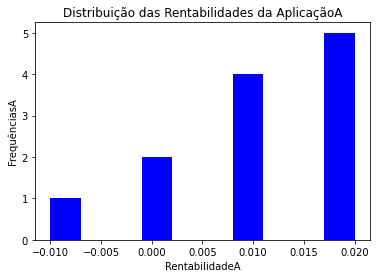

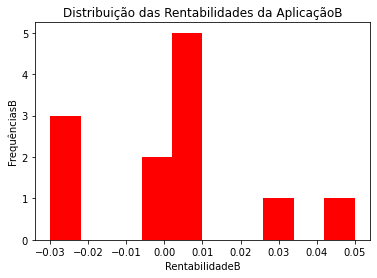

In [13]:
import matplotlib.pyplot as plt

xA = RentabilidadeA
xB = RentabilidadeB

plt.hist(xA,color = 'blue')
plt.xlabel('RentabilidadeA')
plt.ylabel('FrequênciasA')
plt.title('Distribuição das Rentabilidades da AplicaçãoA')
plt.show()

plt.hist(xB, color='red')
plt.xlabel('RentabilidadeB')
plt.ylabel('FrequênciasB')
plt.title('Distribuição das Rentabilidades da AplicaçãoB')
plt.show()

In [14]:
import matplotlib.pyplot as plt

tentativas = 12

lista_rentabilidadeA = RentabilidadeA.tolist()    # Transformando array para lista
lista_rentabilidadeB = RentabilidadeB.tolist()    # Transformando array para lista

lista_meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

lista_saldo_inicialA = [40000,0,0,0,0,0,0,0,0,0,0,0]
lista_saldo_inicialB = [40000,0,0,0,0,0,0,0,0,0,0,0]

matriz_rentabilidadeA = pd.DataFrame(lista_rentabilidadeA, index = lista_meses, columns = ['RentabilidadeA (%)'])
matriz_rentabilidadeB = pd.DataFrame(lista_rentabilidadeB, index = lista_meses, columns = ['RentabilidadeB (%)'])

for k in range(tentativas):
    if k ==0:
        matriz_rentabilidadeA['Saldo inicialA'] = 40000
        matriz_rentabilidadeA['RentabilidadeA'] = matriz_rentabilidadeA['Saldo inicialA'] * matriz_rentabilidadeA['RentabilidadeA (%)']
        matriz_rentabilidadeA['Saldo FinalA'] = matriz_rentabilidadeA['Saldo inicialA']+matriz_rentabilidadeA['Saldo inicialA'] * matriz_rentabilidadeA['RentabilidadeA (%)']
        
    else:
        matriz_rentabilidadeA['Saldo inicialA'][k]= matriz_rentabilidadeA['Saldo FinalA'][k-1]
        matriz_rentabilidadeA['RentabilidadeA'] = matriz_rentabilidadeA['Saldo inicialA'] * matriz_rentabilidadeA['RentabilidadeA (%)']
        matriz_rentabilidadeA['Saldo FinalA'] = matriz_rentabilidadeA['Saldo inicialA']+matriz_rentabilidadeA['Saldo inicialA'] * matriz_rentabilidadeA['RentabilidadeA (%)']

print('Aplicação A: \n',matriz_rentabilidadeA, '\n')
#media_rentabilidadeA = matriz_rentabilidadeA['RentabilidadeA'].mean()
#mediana_rentabilidadeA = matriz_rentabilidadeA['RentabilidadeA'].median()
#moda_rentabilidadeA = matriz_rentabilidadeA['RentabilidadeA'].mode()
#desvio_padrao_rentabilidadeA = matriz_rentabilidadeA['RentabilidadeA'].std()
#maxima_rentabilidadeA = matriz_rentabilidadeA['RentabilidadeA'].max()
#minima_rentabilidadeA = matriz_rentabilidadeA['RentabilidadeA'].min()

#Sumário EstatísticaA
print('\nEstatísticas Aplicação A:\n', matriz_rentabilidadeA.describe())
print('\n--------------------------------------------------------------------------')



for k in range(tentativas):
    if k ==0:
        matriz_rentabilidadeB['Saldo inicialB'] = 40000
        matriz_rentabilidadeB['RentabilidadeB'] = matriz_rentabilidadeB['Saldo inicialB'] * matriz_rentabilidadeB['RentabilidadeB (%)']
        matriz_rentabilidadeB['Saldo FinalB'] = matriz_rentabilidadeB['Saldo inicialB']+matriz_rentabilidadeB['Saldo inicialB'] * matriz_rentabilidadeB['RentabilidadeB (%)']
        
    else:
        matriz_rentabilidadeB['Saldo inicialB'][k]= matriz_rentabilidadeB['Saldo FinalB'][k-1]
        matriz_rentabilidadeB['RentabilidadeB'] = matriz_rentabilidadeB['Saldo inicialB'] * matriz_rentabilidadeB['RentabilidadeB (%)']
        matriz_rentabilidadeB['Saldo FinalB'] = matriz_rentabilidadeB['Saldo inicialB']+matriz_rentabilidadeB['Saldo inicialB'] * matriz_rentabilidadeB['RentabilidadeB (%)']
        
print('\nAplicação B: \n',matriz_rentabilidadeB, '\n')
#media_rentabilidadeB = matriz_rentabilidadeB['RentabilidadeB'].mean()
#mediana_rentabilidadeB = matriz_rentabilidadeB['RentabilidadeB'].median()
#moda_rentabilidadeB = matriz_rentabilidadeB['RentabilidadeB'].mode()
#desvio_padrao_rentabilidadeB = matriz_rentabilidadeB['RentabilidadeB'].std()
#maxima_rentabilidadeB = matriz_rentabilidadeB['RentabilidadeB'].max()
#minima_rentabilidadeB = matriz_rentabilidadeB['RentabilidadeB'].min()

#Sumário EstatísticaB
print('\nEstatísticas Aplicação B:\n',matriz_rentabilidadeB.describe(), '\n')

Aplicação A: 
            RentabilidadeA (%)  Saldo inicialA  RentabilidadeA  Saldo FinalA
Janeiro                  0.02           40000          800.00     40,800.00
Fevereiro               -0.01           40800         -408.00     40,392.00
Março                    0.02           40392          807.84     41,199.84
Abril                    0.01           41199          411.99     41,610.99
Maio                     0.01           41610          416.10     42,026.10
Junho                    0.00           42026            0.00     42,026.00
Julho                    0.02           42026          840.52     42,866.52
Agosto                   0.00           42866            0.00     42,866.00
Setembro                 0.02           42866          857.32     43,723.32
Outubro                  0.01           43723          437.23     44,160.23
Novembro                 0.01           44160          441.60     44,601.60
Dezembro                 0.02           44601          892.02     45,493.

<ipython-input-14-213fda4a0894>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matriz_rentabilidadeA['Saldo inicialA'][k]= matriz_rentabilidadeA['Saldo FinalA'][k-1]
<ipython-input-14-213fda4a0894>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matriz_rentabilidadeB['Saldo inicialB'][k]= matriz_rentabilidadeB['Saldo FinalB'][k-1]


### Várias Simulações

<ipython-input-15-00a5a6384593>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matriz_rentabilidadeA['Saldo inicialA'][k]= matriz_rentabilidadeA['Saldo FinalA'][k-1]
<ipython-input-15-00a5a6384593>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matriz_rentabilidadeB['Saldo inicialB'][k]= matriz_rentabilidadeB['Saldo FinalB'][k-1]


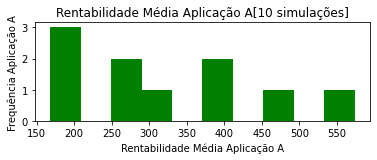

A Rentabilidade Média da Aplicação A após 10 simulações: 322.38275

------------------------------------------------------------------------



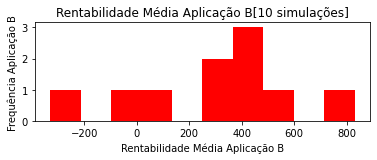

A Rentabilidade Média da Aplicação B após 10 simulações: 273.453


In [15]:
import matplotlib.pyplot as plt

# Entradas

num_simulacoes = 10

resultadoA = []
resultadoB = []

for i in range(num_simulacoes):
    #Execute até encontrar a rentabilidade média no ano
    tentativas = 12
    
    ProbabilidadeA = dist_freqA['ProbabilidadeA']
    RentabilidadeA = np.random.choice(dist_freqA['RentabilidadeA'], tentativas, p = dist_freqA['ProbabilidadeA'])

    ProbabilidadeB = dist_freqB['ProbabilidadeB']
    RentabilidadeB = np.random.choice(dist_freqB['RentabilidadeB'], tentativas, p = dist_freqB['ProbabilidadeB'])


    lista_rentabilidadeA = RentabilidadeA.tolist()    # Transformando array para lista
    lista_rentabilidadeB = RentabilidadeB.tolist()    # Transformando array para lista

    lista_meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

    lista_saldo_inicialA = [40000,0,0,0,0,0,0,0,0,0,0,0]
    lista_saldo_inicialB = [40000,0,0,0,0,0,0,0,0,0,0,0]

    matriz_rentabilidadeA = pd.DataFrame(lista_rentabilidadeA, index = lista_meses, columns = ['RentabilidadeA (%)'])
    matriz_rentabilidadeB = pd.DataFrame(lista_rentabilidadeB, index = lista_meses, columns = ['RentabilidadeB (%)'])

    for k in range(tentativas):
        if k ==0:
            matriz_rentabilidadeA['Saldo inicialA'] = 40000
            matriz_rentabilidadeA['RentabilidadeA'] = matriz_rentabilidadeA['Saldo inicialA'] * matriz_rentabilidadeA['RentabilidadeA (%)']
            matriz_rentabilidadeA['Saldo FinalA'] = matriz_rentabilidadeA['Saldo inicialA']+matriz_rentabilidadeA['Saldo inicialA'] * matriz_rentabilidadeA['RentabilidadeA (%)']
        
        else:
            matriz_rentabilidadeA['Saldo inicialA'][k]= matriz_rentabilidadeA['Saldo FinalA'][k-1]
            matriz_rentabilidadeA['RentabilidadeA'] = matriz_rentabilidadeA['Saldo inicialA'] * matriz_rentabilidadeA['RentabilidadeA (%)']
            matriz_rentabilidadeA['Saldo FinalA'] = matriz_rentabilidadeA['Saldo inicialA']+matriz_rentabilidadeA['Saldo inicialA'] * matriz_rentabilidadeA['RentabilidadeA (%)']

    media_rentabilidadeA = matriz_rentabilidadeA['RentabilidadeA'].mean()
    resultadoA.append(media_rentabilidadeA)
    #print('A média anual da rentabilidadeA: ',resultadoA)
    #print('\n--------------------------------------------------------------------------')
    
    for k in range(tentativas):
        if k ==0:
            matriz_rentabilidadeB['Saldo inicialB'] = 40000
            matriz_rentabilidadeB['RentabilidadeB'] = matriz_rentabilidadeB['Saldo inicialB'] * matriz_rentabilidadeB['RentabilidadeB (%)']
            matriz_rentabilidadeB['Saldo FinalB'] = matriz_rentabilidadeB['Saldo inicialB']+matriz_rentabilidadeB['Saldo inicialB'] * matriz_rentabilidadeB['RentabilidadeB (%)']
        
        else:
            matriz_rentabilidadeB['Saldo inicialB'][k]= matriz_rentabilidadeB['Saldo FinalB'][k-1]
            matriz_rentabilidadeB['RentabilidadeB'] = matriz_rentabilidadeB['Saldo inicialB'] * matriz_rentabilidadeB['RentabilidadeB (%)']
            matriz_rentabilidadeB['Saldo FinalB'] = matriz_rentabilidadeB['Saldo inicialB']+matriz_rentabilidadeB['Saldo inicialB'] * matriz_rentabilidadeB['RentabilidadeB (%)']
        
    media_rentabilidadeB = matriz_rentabilidadeB['RentabilidadeB'].mean()
    resultadoB.append(media_rentabilidadeB)
    #print('A média anual da rentabilidadeB: ',resultadoB)
    #print('\n--------------------------------------------------------------------------')
#print('Lista dos Resultados da Aplicação A em ',num_simulacoes,':',resultadoA)
# Mostrando o gráfico após o término das simulações
plt.subplot(2,1,1)
plt.title("Rentabilidade Média Aplicação A[" + str(num_simulacoes) + " simulações]")
plt.xlabel("Rentabilidade Média Aplicação A")
plt.ylabel("Frequência Aplicação A")
plt.hist(resultadoA, color = 'green')
plt.show()

#Exibindo as médias
ResultadoA_medio = sum(resultadoA)/len(resultadoA)
print("A Rentabilidade Média da Aplicação A após " + str(num_simulacoes) + " simulações: " + str(ResultadoA_medio)+'\n')

print('------------------------------------------------------------------------\n')
#print('Lista dos Resultados da Aplicação B em ',num_simulacoes,':',resultadoB)
# Mostrando o gráfico após o término das simulações
plt.subplot(2,1,2)
plt.title("Rentabilidade Média Aplicação B[" + str(num_simulacoes) + " simulações]")
plt.xlabel("Rentabilidade Média Aplicação B")
plt.ylabel("Frequência Aplicação B")
plt.hist(resultadoB, color = 'red')
plt.show()

#Exibindo as médias
ResultadoB_medio = sum(resultadoB)/len(resultadoB)
print("A Rentabilidade Média da Aplicação B após " + str(num_simulacoes) + " simulações: " + str(ResultadoB_medio))

